## Import Libraries

In [2]:
import pandas as pd # Pandas for data manipulations
import numpy as np  # Numpy for the computations
import os
from sklearn.metrics import accuracy_score,classification_report # For metrics
from sklearn.metrics import make_scorer,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split             # For train and test splits
from sklearn.model_selection import GridSearchCV                 # For GridSearch and K-fold cross validation
from sklearn.impute import SimpleImputer                         # For Imputation

import matplotlib.pyplot as plt # For visualizations
import seaborn as sns           # For visualizations

import warnings                   # For warnings
warnings.filterwarnings('ignore') # Supress/Ignore warnings

### Function for training the model

In [3]:
# Function for training the model
def fn_train_model(model, 
                X_train, 
                y_train, 
                parameters = None, 
                k = 1):
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
    return model

In [4]:
# Function to generate classification metrics



def fn_compute_model_metrics(model, model_name, 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1):
    """
    accuracy_score, precision_score, recall_score,f1_score     
    
    """    
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_    
  
    metrics = {}
    # train metrics
    train_predictions = model.predict(X_train)
    metrics['train_accuracy']    = round(accuracy_score(y_train, train_predictions),4)
    metrics['train_precision']   = round(precision_score(y_train, train_predictions),4)
    metrics['train_recall']      = round(recall_score(y_train, train_predictions),4)
    metrics['train_f1_score']    = round(f1_score(y_train, train_predictions),4)
    #metrics['train_model_score'] = round(base_lrc.score(X_train, y_train),4)
    # test metrics
    test_predictions  = model.predict(X_test)
    metrics['test_accuracy']     = round(accuracy_score(y_test, test_predictions),4)
    metrics['test_precision']    = round(precision_score(y_test, test_predictions),4)
    metrics['test_recall']       = round(recall_score(y_test, test_predictions),4)
    metrics['test_f1_score']     = round(f1_score(y_test, test_predictions),4)
    #metrics['test_model_score']  = round(base_lrc.score(X_test, y_test),4)
   
    return pd.Series(metrics, name = model_name)

### # Function to generate classification metrics

In [5]:
# Function to generate classification metrics
def fn_compute_metrics(model,
                       model_name,
                       train_data, 
                       train_actuals,
                       test_data,
                       test_actuals):
    """
    accuracy_score, precision_score, recall_score,f1_score 
    
    
    """
    metrics = {}
    # train metrics
    train_predictions = model.predict(train_data)
    metrics['train_accuracy']    = accuracy_score(train_actuals, train_predictions)
    metrics['train_precision']   = precision_score(train_actuals, train_predictions)
    metrics['train_recall']      = recall_score(train_actuals, train_predictions)
    metrics['train_f1_score']    = f1_score(train_actuals, train_predictions)

    # test metrics
    test_predictions  = model.predict(test_data)
    metrics['test_accuracy']     = accuracy_score(test_actuals, test_predictions)
    metrics['test_precision']    = precision_score(test_actuals, test_predictions)
    metrics['test_recall']       = recall_score(test_actuals, test_predictions)
    metrics['test_f1_score']     = f1_score(test_actuals, test_predictions)


   
    return pd.Series(metrics, name = model_name)

In [6]:
# Function to generate classification metrics

def fn_compute_metrics_train(model, 
                       data, 
                       actuals):
    
    predictions = model.predict(data)
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    fe_recall = recall_score(actuals, predictions, average = None)[0]
    print('Recall score :', fe_recall)
    
    return fe_recall

### Train/Validation data reading

In [7]:
folder="D:/Notes/TechGig/data"

In [130]:
df = pd.read_csv(folder+ u'//'+'Phising_Training_Dataset.csv')
df.index=df['key']
df.drop('key', inplace=True, axis=1)
print(df.shape)
df.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [9]:
print("Number of duplicate rows: ", df[df.duplicated()].shape[0]," % of rows: ",(df[df.duplicated()].shape[0]*100/df.shape[0])) 

Number of duplicate rows:  3741  % of rows:  41.77554438860972


In [132]:
df_train=df#pd.DataFrame.drop_duplicates(df)
print(df_train.shape)
df_train.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [11]:
df_test = pd.read_csv(folder+u'//'+'Phising_Testing_Dataset.csv')
df_test.index=df_test['key']
df_test.drop('key', inplace=True, axis=1)
print(df_test.shape)
df_test.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [12]:
print("Number of duplicate rows: ", df_test[df_test.duplicated()].shape[0]," % of rows: ",(df_test[df_test.duplicated()].shape[0]*100/df_test.shape[0])) 

Number of duplicate rows:  409  % of rows:  19.476190476190474


## Remove 'URL_of_Anchor' and 'SSLfinal_State'

In [133]:
dropCol=['URL_of_Anchor', 'SSLfinal_State','RightClick']#,'Favicon', 'Iframe', 'Redirect','port',  
#'double_slash_redirecting', 'on_mouseover',  'Statistical_report','HTTPS_token','having_At_Symbol']

df_train.drop(columns=dropCol,inplace=True)

In [14]:
#df_train=pd.DataFrame.drop_duplicates(df_train)
print(df_train.shape)
df_train.head()

(8955, 28)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [15]:
print("Number of duplicate rows: ", df_train[df_train.duplicated()].shape[0]," % of rows: ",(df_train[df_train.duplicated()].shape[0]*100/df_train.shape[0])) 

Number of duplicate rows:  4305  % of rows:  48.073701842546065


In [16]:
df_train.columns

Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'Links_in_tags', 'SFH', 'Submitting_to_email',
       'Abnormal_URL', 'Redirect', 'on_mouseover', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

### Divide data into training and validation subsets

In [17]:
# Divide data into training and validation subsets
y = df_train['Result']
X = df_train.drop(['Result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)

In [18]:
# Divide data into training and validation subsets
y_train_all= df_train['Result']
X_train_all = df_train.drop(['Result'], axis=1)
y_train_all = y_train_all.astype('category')
print('X_train_all dimensions: ', X_train_all.shape)
print('y_train_all dimensions: ', y_train_all.shape)

X_train_all dimensions:  (8955, 27)
y_train_all dimensions:  (8955,)


In [19]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [20]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (7164, 27)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 27)
y_test dimensions:   (1791,)


 1    5034
-1    3921
Name: Result, dtype: int64

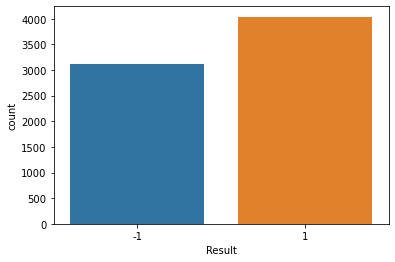

In [21]:
plot_data = y_train.to_frame()
sns.countplot(x = 'Result', data=plot_data)
df_train.Result.value_counts()

# Models

# LogisticRegression

In [22]:

from sklearn.linear_model import LogisticRegression
base_lrc = LogisticRegression()


In [53]:
%%time
base_metrics = fn_compute_model_metrics(base_lrc, 'base_lrc', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)

base_metrics= base_metrics.to_frame()

Wall time: 67.7 ms


In [54]:
%%time
parametersBest = {
    "penalty" : ['l2'],#,'l1', 'l2', 'elasticnet', 'none'],
    "class_weight" : ['balanced'],"n_jobs" : [-1],
    "random_state" : [1]}

para_metrics = fn_compute_model_metrics(base_lrc, 'para_lrc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

Wall time: 4.45 s


In [55]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)
dfMetrics=model_metrics.copy()

## K-Nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_jobs=-1)

In [58]:
%%time
base_metrics = fn_compute_model_metrics(knn, 'base_knn', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 2.35 s


%%time
parameters = {'weights' :['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski'],
              'leaf_size':[10,20,30,40]
             }
cv_model = fn_train_model(knn, X_train, y_train, parameters, k = 5)
cv_model

In [59]:
 parametersBest = {'weights' :['uniform'],
              'algorithm' : [ 'ball_tree'],
              'metric':['minkowski'],
              'leaf_size':[20]
             } 

In [60]:
%%time
para_metrics = fn_compute_model_metrics(knn, 'para_knn', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

Wall time: 2.75 s


In [61]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [62]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn
train_accuracy,0.8206,0.8170,0.9178,0.9183
train_precision,0.8443,0.8616,0.9302,0.9324
train_recall,0.8361,0.8047,0.9235,0.9220
train_f1_score,0.8402,0.8322,0.9268,0.9272
test_accuracy,0.8046,0.8018,0.8621,0.8649
test_precision,0.8326,0.8546,0.8769,0.8798
test_recall,0.8109,0.7746,0.8742,0.8763
test_f1_score,0.8216,0.8127,0.8756,0.8780


## Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC
svm=LinearSVC(random_state=123)


In [64]:
%%time
base_metrics = fn_compute_model_metrics(svm, 'base_svm', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 493 ms


In [36]:
%%time
parameters = {  'penalty': ['l1', 'l2'],
              'loss':['hinge', 'squared_hinge'],
              'C':[0.0001, 0.001, 0.01,1],
             }
cv_model = fn_train_model(svm, X_train, y_train, parameters, k = 5)
cv_model

Wall time: 2.57 s


LinearSVC(C=1, loss='hinge', random_state=123)

In [65]:
parametersBest = {  'penalty': ['l2'],
              'loss':['hinge'],
              'C':[1],
             }

In [66]:
para_metrics = fn_compute_model_metrics(svm, 'para_svm', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [67]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [68]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241


# DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [70]:
%%time
base_metrics = fn_compute_model_metrics(dtc, 'base_dtc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 49.8 ms


In [43]:
%%time

parameters = {'max_depth' : range(1,8),  # 7
              'min_impurity_decrease' : [0.001, 0.01,0.05], #3
              'min_samples_split':[3,5,7,9,11], #5
              'criterion':['gini','entropy'] #{"gini", "entropy"}
             } # total models=7*3*5*1=105

cv_model = fn_train_model(dtc,
                          X_train,
                          y_train,parameters, k=5)
cv_model

Wall time: 11.8 s


DecisionTreeClassifier(criterion='entropy', max_depth=7,
                       min_impurity_decrease=0.001, min_samples_split=3)

In [71]:
parametersBest = {'max_depth' :[6],  # 7
              'min_impurity_decrease' : [0.001], #3
              'min_samples_split':[3], #5
              'criterion':['entropy'] #{"gini", "entropy"}
             } # total models=7*3*5*1=105
para_metrics = fn_compute_model_metrics(dtc, 'para_dtc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()


In [72]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [73]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325


##  Bagging Decision Tree (Ensemble Learning I)

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier()

In [75]:
%%time
base_metrics = fn_compute_model_metrics(bg, 'bg_dtc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 221 ms


In [ ]:
%%time

parameters = {'n_estimators':[5,10,15],
              'max_samples' : [0.5, 0.75,1],
              'max_features':[0.5, 0.75,1],
             } 

cv_model = fn_train_model(bg,
                          X_train,
                          y_train,parameters, k=5)
cv_model

In [76]:
parametersBest = {'n_estimators':[15],
              'max_samples' : [0.75],
              'max_features':[ 0.5],
             } 
para_metrics = fn_compute_model_metrics(bg, 'para_bgdtc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [77]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [78]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)

## Boosting Decision Tree (Ensemble Learning II)/Ada boost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier()


In [80]:
%%time
base_metrics = fn_compute_model_metrics(adb, 'base_adb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 441 ms


In [ ]:
%%time
parameters = {'weights' :['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski'],
              'leaf_size':[10,20,30,40]
             }
cv_model = fn_train_model(knn, X_train, y_train, parameters, k = 5)
cv_model

In [81]:
parametersBest = {'learning_rate':[ 0.3],
               'n_estimators':[300]}
para_metrics = fn_compute_model_metrics(adb, 'para_adb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [82]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [83]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392


In [86]:
from sklearn.metrics import confusion_matrix

# DCT Visualizing the rules

In [87]:
%%time
final_dtc = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
                                   
final_dtc_model = fn_train_model(final_dtc, X_train, y_train)
final_dtc_model_metrics = fn_compute_metrics_train(final_dtc_model,X_test,y_test)

print(final_dtc_model)
print(final_dtc_model_metrics)


Confusion Matrix :
[[639 158]
 [166 828]]

Report : 
              precision    recall  f1-score   support

          -1       0.79      0.80      0.80       797
           1       0.84      0.83      0.84       994

    accuracy                           0.82      1791
   macro avg       0.82      0.82      0.82      1791
weighted avg       0.82      0.82      0.82      1791

Recall score : 0.8017565872020075
DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       min_samples_split=3)
0.8017565872020075
Wall time: 28.9 ms


In [88]:
from sklearn.tree import export_graphviz
import graphviz

# Function to generate the tree
def plot_tree(model, dataframe, plot_title):
    # Class labels
    label_names=["1", "-1"]
    
    # Obtaining plot data.
    graph_data=export_graphviz(model,
                               feature_names=dataframe.columns,
                               class_names=label_names,
                               filled=True,
                               rounded=True,
                               out_file=None)

    # Generating plot.
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph

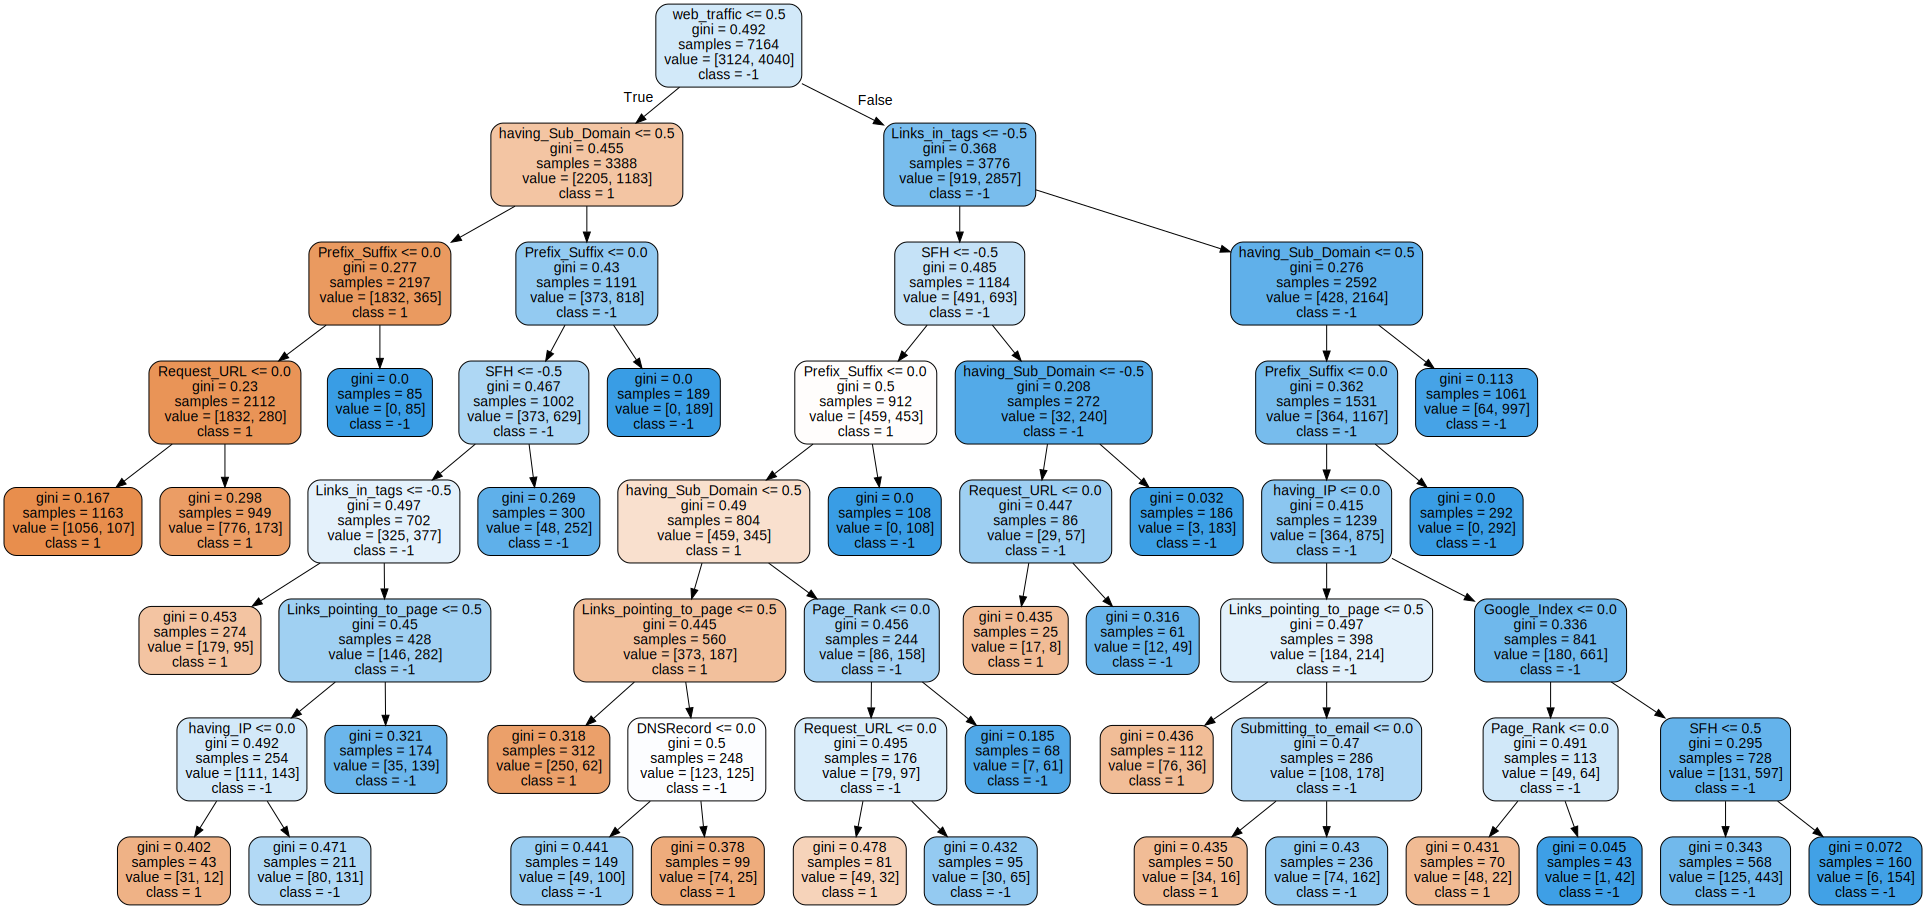

In [89]:
tree_graph=plot_tree(final_dtc, X_train, 'Tree')
tree_graph

# Print DCT the rules

In [90]:
from sklearn.tree import export_text
r = export_text(final_dtc, 
                feature_names=X_train.columns.values.tolist())
print(r)

|--- web_traffic <= 0.50
|   |--- having_Sub_Domain <= 0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- Request_URL <= 0.00
|   |   |   |   |--- class: -1
|   |   |   |--- Request_URL >  0.00
|   |   |   |   |--- class: -1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|   |--- having_Sub_Domain >  0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- SFH <= -0.50
|   |   |   |   |--- Links_in_tags <= -0.50
|   |   |   |   |   |--- class: -1
|   |   |   |   |--- Links_in_tags >  -0.50
|   |   |   |   |   |--- Links_pointing_to_page <= 0.50
|   |   |   |   |   |   |--- having_IP <= 0.00
|   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |--- having_IP >  0.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Links_pointing_to_page >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- SFH >  -0.50
|   |   |   |   |--- class: 1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|--- web_traffic >  0.50
|   |--- L

# RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -2,
                             random_state = 1)
# Function for training the model
from sklearn.metrics import make_scorer

In [92]:
%%time
base_metrics = fn_compute_model_metrics(rfc, 'base_rfc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 356 ms


In [ ]:
%%time

parameters = {"n_estimators" :[100, 150,200]
    ,"min_samples_leaf" : [  3, 5, 10]
    ,"max_features":  [0.5, 'log2', 'sqrt']
    ,"class_weight" : ['balanced_subsample']
}

cv_model = fn_train_model(rfc, X_train, y_train, parameters, k = 5)

print(cv_model)


In [93]:
parametersBest = {"n_estimators" :[200]
    ,"min_samples_leaf" : [  3]
    ,"max_features":  [ 'sqrt']
    ,"class_weight" : ['balanced_subsample']
}
para_metrics = fn_compute_model_metrics(rfc, 'para_rfc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [94]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [95]:
%%time
final_rfc= RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features= 'sqrt', #'auto', 0.5
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

final_rfc_model = fn_train_model(final_rfc, X_train, y_train)
final_rfc_model_metrics = fn_compute_metrics(cv_model, 'parameters',
                                        X_train, y_train,
                                        X_test, y_test)

print(final_rfc_model)
print(final_rfc_model_metrics)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       n_estimators=200, n_jobs=-1)
train_accuracy     0.845059
train_precision    0.882307
train_recall       0.836881
train_f1_score     0.858994
test_accuracy      0.821887
test_precision     0.856389
test_recall        0.815895
test_f1_score      0.835652
Name: parameters, dtype: float64
Wall time: 471 ms


In [96]:
train_dtc_model_metrics = fn_compute_metrics_train(final_rfc_model,X_test,y_test)
print(train_dtc_model_metrics)


Confusion Matrix :
[[695 102]
 [102 892]]

Report : 
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       797
           1       0.90      0.90      0.90       994

    accuracy                           0.89      1791
   macro avg       0.88      0.88      0.88      1791
weighted avg       0.89      0.89      0.89      1791

Recall score : 0.8720200752823086
0.8720200752823086


In [97]:
final_rfc_model.feature_importances_

array([0.02962788, 0.01969744, 0.01141365, 0.00861116, 0.00968365,
       0.11423307, 0.16551082, 0.03243044, 0.01155972, 0.00752714,
       0.01082334, 0.0450983 , 0.07415172, 0.05285626, 0.01168762,
       0.01126298, 0.00864849, 0.00943494, 0.0134077 , 0.00629141,
       0.02927939, 0.02393541, 0.20590493, 0.02614204, 0.01742931,
       0.03326759, 0.0100836 ])

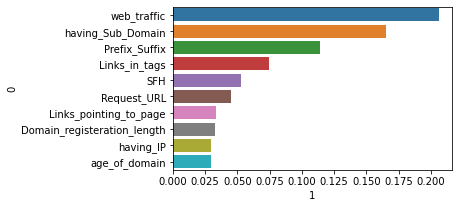

In [152]:
feature_names = list(X_train.columns)
plt.figure(figsize=(5,3))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:10]
sns.barplot(d[1],d[0])

In [154]:
d.columns=["variable", "percantage (%)"]
d["percantage (%)"] = d["percantage (%)"] * 100
d

,variable,percantage (%)
22,web_traffic,20.59
6,having_Sub_Domain,16.55
5,Prefix_Suffix,11.42
12,Links_in_tags,7.42
13,SFH,5.29
11,Request_URL,4.51
25,Links_pointing_to_page,3.33
7,Domain_registeration_length,3.24
0,having_IP,2.96
20,age_of_domain,2.93


In [151]:
pd.set_option('precision', 2)

In [99]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,16))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:]
d*100

,0,1
22,web_trafficweb_trafficweb_trafficweb_trafficwe...,20.590493
6,having_Sub_Domainhaving_Sub_Domainhaving_Sub_D...,16.551082
5,Prefix_SuffixPrefix_SuffixPrefix_SuffixPrefix_...,11.423307
12,Links_in_tagsLinks_in_tagsLinks_in_tagsLinks_i...,7.415172
13,SFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHS...,5.285626
11,Request_URLRequest_URLRequest_URLRequest_URLRe...,4.50983
25,Links_pointing_to_pageLinks_pointing_to_pageLi...,3.326759
7,Domain_registeration_lengthDomain_registeratio...,3.243044
0,having_IPhaving_IPhaving_IPhaving_IPhaving_IPh...,2.962788
20,age_of_domainage_of_domainage_of_domainage_of_...,2.927939


<Figure size 1440x1152 with 0 Axes>

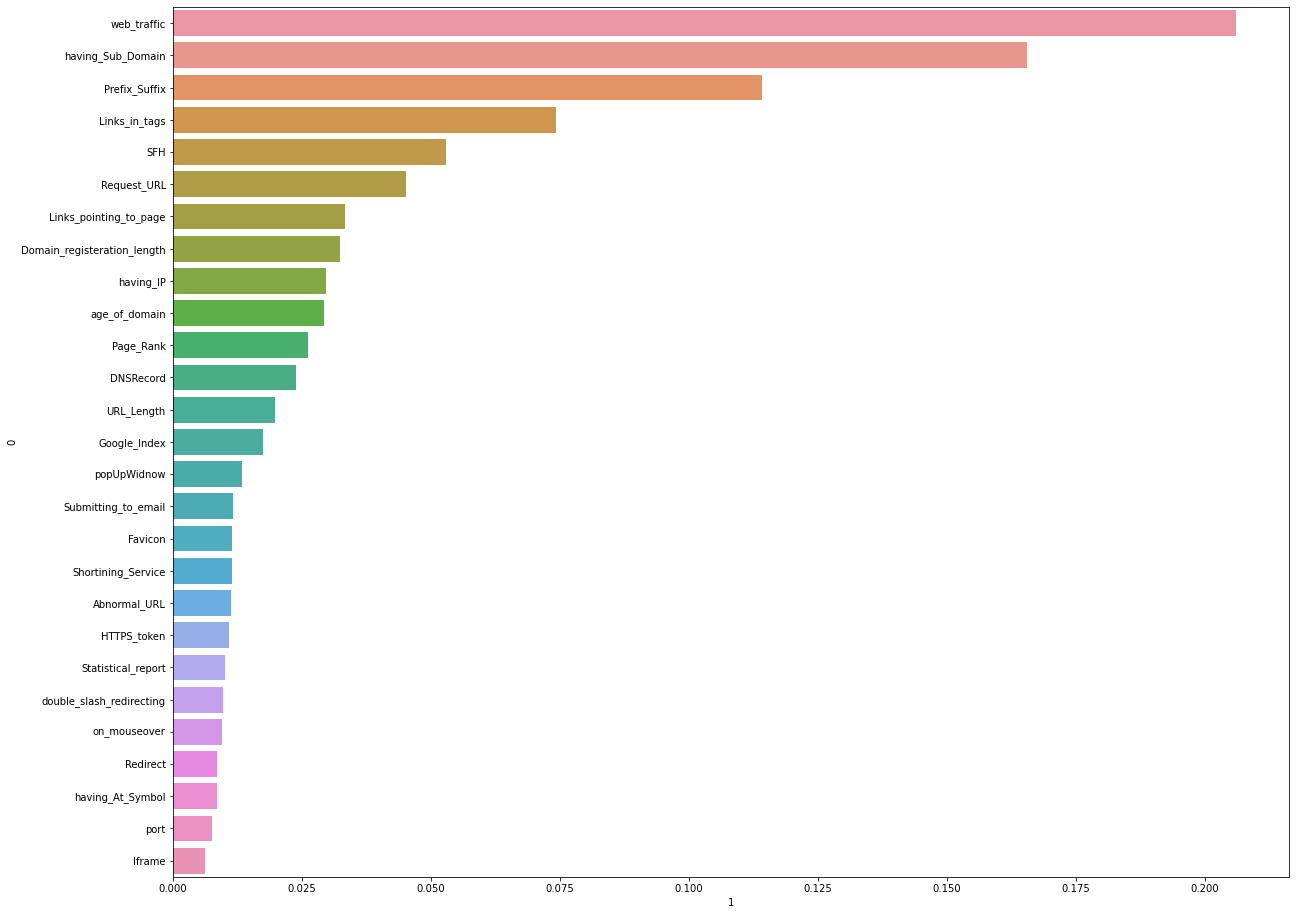

In [100]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,16))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:]
sns.barplot(d[1],d[0])

In [101]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_rfc,para_rfc
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333,0.9676,0.9238
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510,0.9680,0.9519
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540,0.9748,0.9109
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525,0.9714,0.9309
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241,0.9107,0.8883
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518,0.9064,0.9110
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270,0.9356,0.8853
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392,0.9208,0.8980


# Gradient Boosting Machines model.

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [103]:
%%time
base_metrics = fn_compute_model_metrics(gb, 'base_gb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 1.06 s


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.1, 0.5, 0.8],
               'n_estimators':[5, 10,15, 20],
               'max_depth':[2, 3, 5, 10],
               'warm_start': [True]
                }

cv_model = fn_train_model(gb,
                          X_train,
                          y_train,
                          parameters,
                          k = 5)
print(cv_model)

In [104]:
parametersBest = { 'learning_rate':[0.8],
               'n_estimators':[20],
               'max_depth':[5],
               'warm_start': [True]
                }
para_metrics = fn_compute_model_metrics(gb, 'para_gb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [105]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [106]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_rfc,para_rfc,base_gb,para_gb
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333,0.9676,0.9238,0.8689,0.9213
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510,0.9680,0.9519,0.8841,0.9336
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540,0.9748,0.9109,0.8834,0.9262
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525,0.9714,0.9309,0.8837,0.9299
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241,0.9107,0.8883,0.8453,0.9017
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518,0.9064,0.9110,0.8546,0.9148
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270,0.9356,0.8853,0.8692,0.9074
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392,0.9208,0.8980,0.8618,0.9111


# Ensembles: XGBoost

In [107]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [108]:
%%time
base_metrics = fn_compute_model_metrics(xgb, 'base_xgb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

[05:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 908 ms


In [ ]:
%%time
param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}

xgb_cv_model = fn_train_model(xgb,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(xgb_cv_model)
final_xgb_model_metrics = fn_compute_metrics(xgb_cv_model, 'param_grid',
                                        X_train, y_train,
                                        X_test, y_test)



In [110]:
parametersBest = {
    "model__n_estimators": [10],
    'base_score':[0.5],
    'booster':['gbtree'],
    'max_depth':[6],
    'learning_rate':[0.3],
    "model__learning_rate": [0.05],
}

para_metrics = fn_compute_model_metrics(xgb, 'para_xgb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

[05:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "model__learning_rate", "model__n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "model__learning_rate", "model__n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language binding

In [111]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [112]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_rfc,para_rfc,base_gb,para_gb,base_xgb,para_xgb
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333,0.9676,0.9238,0.8689,0.9213,0.9472,0.9472
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510,0.9680,0.9519,0.8841,0.9336,0.9573,0.9573
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540,0.9748,0.9109,0.8834,0.9262,0.9488,0.9488
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525,0.9714,0.9309,0.8837,0.9299,0.9530,0.9530
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241,0.9107,0.8883,0.8453,0.9017,0.9123,0.9123
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518,0.9064,0.9110,0.8546,0.9148,0.9240,0.9240
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270,0.9356,0.8853,0.8692,0.9074,0.9175,0.9175
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392,0.9208,0.8980,0.8618,0.9111,0.9207,0.9207


# LightGBM

In [113]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [114]:
%%time
base_metrics = fn_compute_model_metrics(lgbm, 'base_lgbm', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

Wall time: 194 ms


In [ ]:
param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "learning_rate": [0.05, 0.1, 0.5, 1],
    "n_jobs" :[-1],
                            'random_state' : [2]
}

lgbm_cv_model = fn_train_model(lgbm,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(lgbm_cv_model)
lgbm_cv_model_metrics = fn_compute_metrics(lgbm_cv_model, 'param_grid',
                                        X_train, y_train,
                                        X_test, y_test)

print(lgbm_cv_model_metrics)

In [115]:
param_grid = {
    "n_estimators": [500],
    "learning_rate": [0.05],
    "n_jobs" :[-1],
                            'random_state' : [2]
}


para_metrics = fn_compute_model_metrics(lgbm, 'param_lgbm', 
                       X_train, y_train, X_test, y_test,
                       parameters = param_grid, k = 5)
para_metrics= para_metrics.to_frame()

In [116]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [117]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_rfc,para_rfc,base_gb,para_gb,base_xgb,para_xgb,base_lgbm,param_lgbm
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333,0.9676,0.9238,0.8689,0.9213,0.9472,0.9472,0.9249,0.9450
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510,0.9680,0.9519,0.8841,0.9336,0.9573,0.9573,0.9375,0.9560
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540,0.9748,0.9109,0.8834,0.9262,0.9488,0.9488,0.9287,0.9460
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525,0.9714,0.9309,0.8837,0.9299,0.9530,0.9530,0.9331,0.9510
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241,0.9107,0.8883,0.8453,0.9017,0.9123,0.9123,0.8945,0.9073
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518,0.9064,0.9110,0.8546,0.9148,0.9240,0.9240,0.9078,0.9182
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270,0.9356,0.8853,0.8692,0.9074,0.9175,0.9175,0.9014,0.9145
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392,0.9208,0.8980,0.8618,0.9111,0.9207,0.9207,0.9046,0.9163


In [119]:
dfMetrics.to_excel(folder+u'//'+ "dfMetrics_After2RemovalV4.xlsx")

# Test

In [135]:
df_test = pd.read_csv(folder+u'//'+'Phising_Testing_Dataset.csv')
df_predict=df_test.copy()

df_predict.index=df_test['key']
df_predict.drop('key', inplace=True, axis=1)
print(df_predict.shape)
df_predict.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [136]:
#dropCol=['URL_of_Anchor', 'SSLfinal_State']
df_predict.drop(columns=dropCol,inplace=True)
df_predict.shape

(2100, 27)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.1, 0.5, 0.8],
               'n_estimators':[5, 10,15, 20],
               'max_depth':[2, 3, 5, 10],
               'warm_start': [True]
                }



gb_cv_model = fn_train_model(gb,
                          X_train_all,
                          y_train_all,
                          parameters,
                          k = 5)
print(gb_cv_model)


                                     

In [ ]:
%%time
param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}

xgb_cv_model = fn_train_model(xgb,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(xgb_cv_model)

In [139]:
xgb_cv_train  = fn_compute_metrics_train(xgb_cv_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3675  246]
 [ 289 4745]]

Report : 
              precision    recall  f1-score   support

          -1       0.93      0.94      0.93      3921
           1       0.95      0.94      0.95      5034

    accuracy                           0.94      8955
   macro avg       0.94      0.94      0.94      8955
weighted avg       0.94      0.94      0.94      8955

Recall score : 0.9372609028309105


In [140]:
train_predictions = xgb_cv_model.predict(X_train_all)


In [141]:

metrics = {}
# train metrics
metrics['train_accuracy']    = round(accuracy_score(y_train_all, train_predictions),4)
metrics['train_precision']   = round(precision_score(y_train_all, train_predictions),4)
metrics['train_recall']      = round(recall_score(y_train_all, train_predictions),4)
metrics['train_f1_score']    = round(f1_score(y_train_all, train_predictions),4)
print(metrics)

{'train_accuracy': 0.9403, 'train_precision': 0.9507, 'train_recall': 0.9426, 'train_f1_score': 0.9466}


In [142]:
test_pred = xgb_cv_model.predict(df_predict)

In [143]:
test_pred[0:10]

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1], dtype=int64)

In [144]:
submissions_df = pd.DataFrame({'key': df_test.key, 'Result': test_pred})
submissions_df.head()

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1


In [145]:
submissions_df['Result'].value_counts()

 1    1112
-1     988
Name: Result, dtype: int64

In [146]:
submissions_df.to_csv(folder+u'//'+ "test_predictions_25thJulyV4_XgB.csv", index=None)